# Collaborative & Content Filtered Book Recommendation
Name: Farel Arden

Berdasarkan salah satu artikel dari Universitas Hasanuddin [tautan](https://journal.unhas.ac.id/index.php/jupiter/article/view/1672), membaca buku merupakan hal yang penting untuk dilakukan. Orang - orang yang memilih untuk sering membaca buku memiliki wawasan yang luas. Lewat membaca, kita juga dapat mengetahui, mengenal banyak hal yang sebelumnya belum dikenal dan kita pelajari dan pahami lewat membaca buku.

<img src= "https://edgecappartners.com/wp-content/uploads/2018/09/boook-e1536947008937.jpg" alt ="Movie" style='width: 400px;'>

Melihat pentingnya dampak buku bagi kehidupan kita, kita perlu banyak membaca buku. Ketika kita membaca buku, kita pasti memiliki ketertarikan kepada satu atau beberapa bidang. Dikarenakan banyaknya buku yang telah dan akan terbit, kita membutuhkan sistem rekomendasi yang akan menyaring buku - buku sesuai dengan selera dan ketertarikan kita. Dengan adanya sistem rekomendasi ini, kita tidak perlu lama - lama dalam mencari buku sesuai ketertarikan kita.

Pada latihan kali ini kita akan menggunakan kedua metode yaitu content dan collaborative based filter.
 - Pada **Content Based Flter**, kita akan menggunakan penulis buku menjadi pusat sebagai pusat dari sistem rekomendasi
 - Pada **Collaborative Based Flter**, kita akan menggunakan penilaian dari berbagai pengguna sebagai pusat dari sistem rekomendasi

___
# Importing Libraries and Dataset

## Importing Libraries

Pada notebook ini saya melakukan import pada beberapa libraries, seperti pandas, numpy, tenserflow, dll.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/book-recommendation-dataset/Ratings.csv
/kaggle/input/book-recommendation-dataset/Users.csv
/kaggle/input/book-recommendation-dataset/Books.csv


## Importing Dataset

Pada notebook ini, kita hanya akan menggunakan dataframe book dan rating untuk content dan collaborative filtered recommendation kita

In [2]:
book_dataset=pd.read_csv('../input/book-recommendation-dataset/Books.csv')
rating_dataset=pd.read_csv('../input/book-recommendation-dataset/Ratings.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Meneliti ukuran dari dataset book 

In [3]:
book_dataset.shape

(271360, 8)

Meneliti ukuran dari dataframe rating

In [4]:
rating_dataset.shape

(1149780, 3)

___
# Data Preprocessing

Meneliti 5 data teratas dari dataframe rating

In [5]:
rating_dataset.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


Memberi nama header baru pada kolom Book-Rating dan User-ID pada rating_dataset

In [6]:
rating_dataset = rating_dataset.rename(columns={'Book-Rating': 'rating','User-ID':'user_id'})

Melihat dari dataframe dari rating dan books terbilang banyak, di sini saya hanya mengambil 10000 row dari book dataset dan 5000 row untuk rating dataset

In [7]:
book_dataset = book_dataset[:10000]
rating_dataset=rating_dataset[:5000]

Cell code di bawah ini dapat dijadikan pertimbangan dalam memproses data, dikarenakan banyak data rating yang bernilai 0, maka ada 2 pilihan, yaitu:
- Membuang semua row yang memiliki nilai 0 pada kolom rating pada rating dataset
- Tetap menggunakan nilai 0 karena 0 bukanlah nilai NaN

Pada notebook kali ini, saya memilih pilihan kedua di mana nilai 0 bukanlah nilai NaN dan tidak membuang row dengan nilai rating 0

In [8]:
# rating_dataset = rating_dataset.drop(rating_dataset[rating_dataset.rating == 0].index)

Meneliti 5 data teratas dari dataset rating

In [9]:
rating_dataset.head()

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


Meneliti 5 data teratas dari dataset buku

In [10]:
book_dataset.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Memberi nama header baru pada kolom Book-Title, Book-Author, Image-URL-S, Image-URL-S,Image-URL-M,Image-URL-L pada book_dataset

In [11]:
book_dataset = book_dataset.rename(columns={'Book-Title': 'book_title','Book-Author':'book_author','Year-Of-Publication':'year_of_publication','Image-URL-S':'Image_URL_S','Image-URL-M':'Image_URL_M','Image-URL-L':'Image_URL_L'})

Meneliti id buku - buku apa saja yang di-rate 10 oleh pengguna

In [12]:
rating_dataset[rating_dataset.rating == max(rating_dataset.rating)]
best_booksId = rating_dataset.ISBN[rating_dataset.rating == max(rating_dataset.rating)]
best_booksId = list(dict.fromkeys(best_booksId))

Meneliti buku - buku apa saja yang di-rate 10 oleh pengguna

In [13]:
best_books = []
for i in best_booksId:
    books_name = book_dataset.book_title[book_dataset.ISBN == i]
    best_books.append(books_name)

In [14]:
best_books

[Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 5731    The Watsons Go to Birmingham - 1963 (Yearling ...
 Name: book_title, dtype: object,
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title, dtype: object),
 8271    Auf Ehre und Gewissen. Roman.
 Name: book_title, dtype: object,
 5732    Im Angesicht des Feindes.
 Name: book_title, dtype: object,
 Series([], Name: book_title, dtype: object),
 Series([], Name: book_title,

Meneliti jumlah buku - buku bagus

In [15]:
len(best_books)

300

## Univariate Data Analys

Meneliti distribusi rating dari rating dataframe dengan Barplot

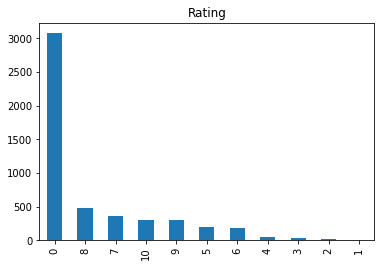

In [16]:
count = rating_dataset["rating"].value_counts()
count.plot(kind='bar', title="Rating");
 
plt.show()

Meneliti distribusi tahun terbitnya buku dari book dataframe dengan Barplot

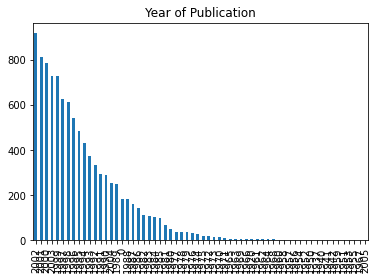

In [17]:
count = book_dataset["year_of_publication"].value_counts()
count.plot(kind='bar', title="Year of Publication");
 
plt.show()

## Multivariate Analysis

Melihat pairplot yang ada pada rating dataset

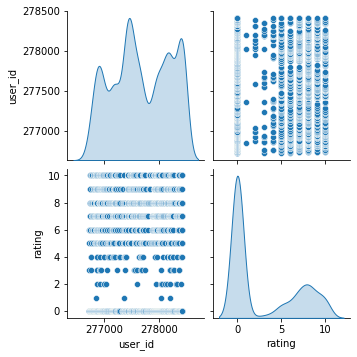

In [18]:
import seaborn as sns
sns.pairplot(rating_dataset, diag_kind = 'kde')

___
# Content Filtered Recommendation System

Content Based Filtering adalah sistem rekomendasi yang merekomendasikan item sesuai dengan item yang disukai oleh pengguna di masa lampau.

Content Based mempelajari profil dan perilaku dari pengguna yang kemudian dari informasi tersebut dianalisa dan diproses sehingga menghasilkan sistem rekomendasi yang baik. Semakin banyak informasi yang diberikan ke sistem ini, maka sistem rekomendasi berbasis content based akan memiliki akurasi yang lebih baik.

## Data Preparation

Di code bawah ini saya men-drop seluruh row yang memiliki nilai NaN

In [19]:
book_dataset = book_dataset.dropna()
rating_dataset = rating_dataset.dropna()

Pada cell code di bawah ini, saya melakukan drop atau pembuangan pada row - row yang merupakan duplikasi dari row - row yang lain, sehingga dataset kita tetap memiliki integritas dan tidak berulang

In [20]:
rating_dataset = rating_dataset.drop_duplicates()
book_dataset = book_dataset.drop_duplicates()

Meneliti deskripsi dari dataset book

In [21]:
book_dataset.shape

(10000, 8)

Meneliti deskripsi dari dataset rating

In [22]:
rating_dataset.shape

(5000, 3)

Melihat 5 row pertama dari dataset book

In [23]:
book_dataset.head()

,ISBN,book_title,book_author,year_of_publication,Publisher,Image_URL_S,Image_URL_M,Image_URL_L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Untuk selanjutnya, kita perlu mengubah dataframe dari buku menjadi sebuah list

In [24]:
book_ISBN = book_dataset['ISBN'].tolist()

book_title = book_dataset['book_title'].tolist()

book_author = book_dataset['book_author'].tolist()

book_year_of_publication = book_dataset['year_of_publication'].tolist()

Setelah kita membuat list, kita perlu membuat dictionary yang digunakan untuk memnentukan pasangan key-value pada book_ISBN, book_title, book_author, dan book_year_of_publication.

In [25]:
book = pd.DataFrame({
    'book_ISBN': book_ISBN,
    'book_title': book_title,
    'book_author': book_author,
    'book_year_of_publication': book_year_of_publication
})
book

,book_ISBN,book_title,book_author,book_year_of_publication
0,0195153448,Classical Mythology,Mark P. O. Morford,2002
1,0002005018,Clara Callan,Richard Bruce Wright,2001
2,0060973129,Decision in Normandy,Carlo D'Este,1991
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999
...,...,...,...,...
9995,0380730774,Read This and Tell Me What It Says : Stories (...,A. Manette Ansay,1998
9996,0862418879,The Star Rover,Jack London,2000
9997,340414645X,Die Keltennadel.,Patrick Dunne,2001
9998,3442730988,Tod in der Datscha.,Anna Malyschewa,2003


## Modeling

Pada content Based Filtering, kita akan menggunakan TF-IDF Vectorizer untuk membangun sistem rekomendasi berdasarkan penulis buku.

TF-IDF yang merupakan kepanjangan dari Term Frequency-Inverse Document Frequency memiliki fungsi untuk mengukur seberapa pentingnya suatu kata terhadap kata - kata lain dalam dokumen.
Kita umumnya menghitung skor untuk setiap kata untuk menandakan pentingnya dalam dokumen dan corpus. Metode sering digunakan dalam Information Retrieval dan Text Mining.

Pada cell code di bawah ini kita akan mengambil kata - kata penting dalam kolom book_author

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
tf = TfidfVectorizer()
 
tf.fit(book['book_author']) 
 
tf.get_feature_names() 

['aaron',
 'aarsen',
 'abbey',
 'abbott',
 'abby',
 'abelar',
 'abraham',
 'abrahams',
 'abzug',
 'achebe',
 'ackerman',
 'ackroyd',
 'ad',
 'adam',
 'adamo',
 'adams',
 'adamson',
 'addis',
 'adele',
 'adeline',
 'adie',
 'adkins',
 'adler',
 'adrian',
 'adriana',
 'adrienne',
 'africa',
 'agatha',
 'agnes',
 'aguiar',
 'agustã',
 'agut',
 'ahdaf',
 'ahlberg',
 'ahne',
 'aidan',
 'aiden',
 'aiken',
 'aileen',
 'aimee',
 'ainslie',
 'akiba',
 'al',
 'alain',
 'alan',
 'alatas',
 'alba',
 'albanese',
 'albano',
 'albert',
 'alberts',
 'albom',
 'albright',
 'alcock',
 'alcorn',
 'alcott',
 'aldiss',
 'aldous',
 'aldrich',
 'aldrin',
 'alec',
 'aleister',
 'alejandro',
 'alejo',
 'aleksandr',
 'aleramo',
 'alers',
 'alesia',
 'alessandra',
 'alessandro',
 'alex',
 'alexa',
 'alexander',
 'alexandra',
 'alexandre',
 'alfie',
 'alfonsi',
 'alford',
 'alfred',
 'ali',
 'alice',
 'alicia',
 'alien',
 'alighieri',
 'alisa',
 'alison',
 'alistair',
 'alix',
 'aljean',
 'allan',
 'allen',
 'all

Kemudian kita akan lakukan fit dan transformasi ke dalam matriks, pada code di bawah ini, matriks tersebut adalah tfidf_matrix

In [27]:
tfidf_matrix = tf.fit_transform(book['book_author']) 
 
tfidf_matrix.shape 

(10000, 5575)

Pada tfidf_matrix terdapat 10000 ukuran data dan 5575 nama penulis buku


.todense(), atribut ini dipakai untuk mengubah tfidf_matrix yang awalnya vektor menjadi matriks

In [28]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Dataframe di bawah ini digunakan untuk melihat matriks dari judul buku dengan penulis - penulis buku

In [29]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=book.book_title
).sample(10, axis=1,replace=True).sample(10, axis=0)

,tamora,roxanne,aileen,merlin,ende,slick,ribarich,coll,updike,augusten
book_title,,,,,,,,,,
Texas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Whispers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mi Planta de Naranja-Lima,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Princess of Thieves,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Bette Davis Murder Case,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Soldier,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
WILD HONEY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hound of the Baskervilles (Aladdin Classics),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Math Curse,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Dalam sistem rekomendasi, kita perlu mencari cara supaya item yang kita rekomendasikan tidak terlalu jauh dari data pusat, oleh karena itu kita butuh derajat kesamaan pada item, dalam proyek ini, buku dengan derajat kesamaan antar buku dengan cosine similarity

In [30]:
from sklearn.metrics.pairwise import cosine_similarity
 
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Pada code di bawah ini kita akan membuat dataframe cosine_sim_df dengan baris dan kolomnya adalah judul dari buku

In [31]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=book['book_title'], columns=book['book_title'])

Di bawah ini adalah fungsi untuk mendapatkan rekomendasi berbasis penulis buku dengan k sebagai jumlah rekomendasi yang diingkan, dalam fungsi ini, kita akan mendapatkan 5 rekomendasi

Atribut argpartition berguna untuk mengambil sejumlah nilai k, dalam fungsi ini 5 tertinggi dari tingkat kesamaan yang berasal dari dataframe cosine_sim_df.

In [32]:
def author_recommendations(i, M, items, k=5):
    ix = M.loc[:,i].to_numpy().argpartition(range(-1,-k,-1))
    closest = M.columns[ix[-1:-(k+2):-1]]
    closest = closest.drop(i, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

Pada code cell di bawah ini, kita akan mencari rekomendasi dari buku yang sudah dibaca, dalam kasus ini, buku yang sudah dibaca adalah "The Diaries of Adam and Eve" yang ditulis oleh Mark Twain dan terbit pada tahun 1998

In [33]:
books_that_have_been_read = "The Diaries of Adam and Eve"
book[book.book_title.eq(books_that_have_been_read)]

,book_ISBN,book_title,book_author,book_year_of_publication
4700,0965881199,The Diaries of Adam and Eve,Mark Twain,1998


Pada cell code di bawah ini, kita akan mendapatkan 5 rekomendasi dari buku "The Diaries of Adam and Eve"

In [34]:
recommendations = author_recommendations(books_that_have_been_read, cosine_sim_df, book[['book_title', 'book_author']])

Pada beberapa kasus, rekomendasi akan memberikan rekomendasi yang terduplikat, sehingga perlu dibuang rekomendasi yang terduplikat

In [35]:
recommendations = recommendations.drop_duplicates()

Berikut adalah 5 buku rekomendasi yang ditulis oleh Mark Twain

In [36]:
recommendations

,book_title,book_author
0,ADVENTURES OF HUCKLEBERRY FINN (ENRICHED CLASS...,Mark Twain
1,Adventures of Huckleberry Finn,Mark Twain
2,The Complete Short Stories of Mark Twain (Bant...,Mark Twain
3,Treasury of Illustrated Classics: Adventures o...,Mark Twain
4,A Connecticut Yankee in King Arthur's Court (D...,Mark Twain


## Evaluation

Kita akan memakai metrik evaluasi akurasi di mana akurasi adalah:

Jumlah buku yang direkomendasikan sesuai dengan penulis buku / Jumlah buku yang direkomendasikan

Variabel books_that_have_been_read_row di bawah ini akan mengambil satu row dari buku yang pernah dibaca sebelumnya, dan variabel books_that_have_been_read_author adalah penulis buku dari buku yang pernah dibaca sebelumnya

In [37]:
books_that_have_been_read_row = book_dataset[book_dataset.book_title == books_that_have_been_read]
books_that_have_been_read_author = books_that_have_been_read_row.iloc[0]["book_author"]

Variabel book_recommendation_authors merupakan sebuah list yang terdiri dari penulis - penulis dari buku - buku yang direkomendasikan oleh sistem

In [38]:
book_recommendation_authors = recommendations.book_author

Code di bawah ini merupakan proses manual di mana setiap penulis dari buku yang direkomendasikan akan dicek, apabila sama, maka variabel real_author akan bertambah 1

In [39]:
real_author = 0
for i in range(5):
    if book_recommendation_authors[i] == books_that_have_been_read_author:
        real_author+=1

Code di bawah ini adalah akurasi dari model sistem rekomendasi, di mana Jumlah buku yang direkomendasikan sesuai dengan penulis buku (Variabel real_author) / Jumlah buku yang direkomendasikan (5)

In [40]:
Accuracy = real_author/5*100
print("Accuracy of the model is {}%".format(Accuracy))

Accuracy of the model is 100.0%


Maka dapat dilihat pada akurasi di atas, model menunjukkan akurasi 100%

___
# Collaborative Filtered Recommendation System

Collaborative Based Filtering adalah sistem rekomendasi berdasarkan pendapat suatu komunitas.

Kelebihan pada Collaborative Based Filtering bila dibandingkan dengan Content Based Filtering adalah pengguna dapat mengeksplorasi item atau konten di luar preferensi pengguna. Pengguna pun juga dapat mendapat rekomendasi sesuai dengan kecenderungan publik yang dianalisa lewat penilaian pengguna - pengguna lainnya.

Kekurangan pada Collaborative Based Filtering adalah pengguna kurang mendapatkan rekomendasi sesuai preferensi pribadi. Konten - konten yang diberikan oleh sistem rekomendasi lebih banyak berasal dari preferensi publik dan bukan preferensi pribadi.

Pada Collaborative Based Filtering, saya menggunakan penilaian dari pengguna - pengguna untuk mendapatkan rekomendasi buku - buku.


## Data Preparation

Pada cell code di bawah ini, saya akan meyandikan user_id menjadi integer

In [41]:
user_ids = rating_dataset['user_id'].unique().tolist()

user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

Pada cell code di bawah ini, saya akan meyandikan book_id menjadi integer

In [42]:
book_ids = rating_dataset['ISBN'].unique().tolist()
book_to_book_encoded = {x: i for i, x in enumerate(book_ids)}
book_encoded_to_book = {i: x for i, x in enumerate(book_ids)}

rating_dataset['user'] = rating_dataset['user_id'].map(user_to_user_encoded)
rating_dataset['book'] = rating_dataset['ISBN'].map(book_to_book_encoded)

Terakhir, kita akan cek jumlah pengguna dan jumlah buku, serta mengubah tipe data rating menjadi float

In [43]:
num_users = len(user_encoded_to_user)
print(num_users)
num_book = len(book_encoded_to_book)
print(num_book)
rating_dataset['rating'] = rating_dataset['rating'].values.astype(np.float32)

min_rating = min(rating_dataset['rating'])
max_rating = max(rating_dataset['rating'])
 
print('Number of User: {}, Number of Resto: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_book, min_rating, max_rating
))

679
4688
Number of User: 679, Number of Resto: 4688, Min Rating: 0.0, Max Rating: 10.0


## Membagi Dataset

Sebelum kita membagi dataset menjadi data latih dan data validasi, kita terlebih dahulu harus mengacak dataset

In [44]:
rating_dataset = rating_dataset.sample(frac=1, random_state=42)
rating_dataset

,user_id,ISBN,rating,user,book
1501,277427,0201000822,10.0,255,1470
2586,277639,0453008739,0.0,335,2487
2653,277639,0671509144,0.0,335,2550
1055,277187,0553281089,0.0,170,1041
705,276964,0886774829,8.0,96,696
...,...,...,...,...,...
4426,278418,0061091464,0.0,678,4127
466,276925,3775713328,0.0,80,461
3092,277928,0937247065,7.0,476,2935
3772,278159,0385318073,5.0,574,3549


Pada cell code di bawah ini, saya membagi dataset yang ada menjadi 70% untuk latihan dan 30% untuk validasi

In [45]:
x = rating_dataset[['user', 'book']].values
 
y = rating_dataset['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
train_indices = int(0.70 * rating_dataset.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[ 255 1470]
 [ 335 2487]
 [ 335 2550]
 ...
 [ 476 2935]
 [ 574 3549]
 [ 139  850]] [1.  0.  0.  ... 0.7 0.5 0.5]


## Model Development

Model yang akan kita pakai dalam sistem rekomendasi berbasis pendapat pengguna adalah RecommenderNet

In [46]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

2021-10-10 11:01:12.670820: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [47]:
class RecommenderNet(tf.keras.Model):
 
  def __init__(self, num_users, num_resto, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_resto = num_resto
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.resto_embedding = layers.Embedding( 
        num_resto,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.resto_bias = layers.Embedding(num_resto, 1) 
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    resto_vector = self.resto_embedding(inputs[:, 1])
    resto_bias = self.resto_bias(inputs[:, 1]) 
 
    dot_user_resto = tf.tensordot(user_vector, resto_vector, 2) 
 
    x = dot_user_resto + user_bias + resto_bias
    
    return tf.nn.sigmoid(x) 

Selanjutnya kita melakukan proses compile pada model dengan binary crossentropy sebagai loss function, adam sebagai optimizer, dan RMSE sebagai metrik dari model

In [48]:
model = RecommenderNet(num_users, num_book, 50)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

2021-10-10 11:01:16.585676: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-10 11:01:16.588921: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-10-10 11:01:16.635047: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-10 11:01:16.635778: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-10-10 11:01:16.635842: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-10-10 11:01:16.662529: I tensorflow/stream_executor/platform/def

Selanjutnya kita akan melatih model dengan batch_size 5 dan 20 epochs

In [49]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 5,
    epochs = 20,
    validation_data = (x_val, y_val)
)

2021-10-10 11:01:18.904706: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-10 11:01:18.915595: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000170000 Hz


Epoch 1/20


2021-10-10 11:01:19.859805: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11


 46/700 [>.............................] - ETA: 2s - loss: 0.6917 - root_mean_squared_error: 0.4360

2021-10-10 11:01:20.675813: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11


700/700 [==============================] - 5s 5ms/step - loss: 0.6787 - root_mean_squared_error: 0.4282 - val_loss: 0.6441 - val_root_mean_squared_error: 0.4115
Epoch 2/20
700/700 [==============================] - 3s 4ms/step - loss: 0.5919 - root_mean_squared_error: 0.3782 - val_loss: 0.6157 - val_root_mean_squared_error: 0.3947
Epoch 3/20
700/700 [==============================] - 3s 4ms/step - loss: 0.5341 - root_mean_squared_error: 0.3442 - val_loss: 0.6004 - val_root_mean_squared_error: 0.3860
Epoch 4/20
700/700 [==============================] - 3s 4ms/step - loss: 0.5061 - root_mean_squared_error: 0.3294 - val_loss: 0.5864 - val_root_mean_squared_error: 0.3784
Epoch 5/20
700/700 [==============================] - 3s 4ms/step - loss: 0.4936 - root_mean_squared_error: 0.3194 - val_loss: 0.5744 - val_root_mean_squared_error: 0.3722
Epoch 6/20
700/700 [==============================] - 3s 4ms/step - loss: 0.4698 - root_mean_squared_error: 0.3067 - val_loss: 0.5644 - val_root_mean_s

## Visualisasi Metrik

Berikut adalah hasil latihan dari data yang ada, evaluasi metrik yang digunakan adalah RMSE

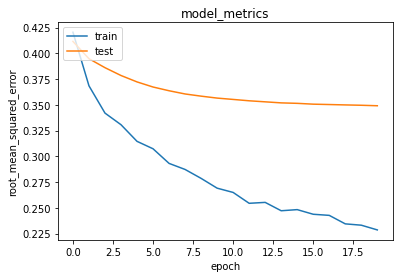

In [50]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Mendapatkan Rekomendasi

Sebelumnya, kita perlu mendefinisikan ulang book_datase dan rating_dataset

In [51]:
book_dataset =  book
rating_dataset = rating_dataset

Pada cell code di bawah ini, kita akan mengambil user_id secara acak dari rating_dataset. Dari user_id ini kita perlu mengetahui buku - buku apa saja yang pernah dibaca dan yang belum pernah dibaca, sehingga kita hanya dapat merekomendasikan buku - buku yang belum dibaca.

In [52]:
user_id = rating_dataset.user_id.sample(1).iloc[0]
books_have_been_read_by_user = rating_dataset[rating_dataset.user_id == user_id]
 
books_have_not_been_read_by_user = book_dataset[book_dataset['book_ISBN'].isin(books_have_been_read_by_user.ISBN.values)]['book_ISBN'] 
books_have_not_been_read_by_user = list(
    set(books_have_not_been_read_by_user)
    .intersection(set(book_to_book_encoded.keys()))
)
 
books_have_not_been_read_by_user = [[book_to_book_encoded.get(x)] for x in books_have_not_been_read_by_user]
user_encoder = user_to_user_encoded.get(user_id)
user_book_array = np.hstack(
    ([[user_encoder]] * len(books_have_not_been_read_by_user), books_have_not_been_read_by_user)
)

Pada code cell terakhir di bawah ini, kita akan merekomendasikan 10 buku dari user

In [53]:
ratings = model.predict(user_book_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_book_ids = [
    book_encoded_to_book.get(books_have_not_been_read_by_user[x][0]) for x in top_ratings_indices
]
 
top_books_recommended = (
    books_have_been_read_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .ISBN.values
)
 
books_row = book_dataset[book_dataset['book_ISBN'].isin(top_books_recommended)]
for row in books_row.itertuples():
    print(row.book_title, ':', row.book_author)
 
print('----' * 8)
print('Top 10 Book Recommendation for user: {}'.format(user_id))
print('----' * 8)
 
recommended_books = book_dataset[book_dataset['book_ISBN'].isin(recommended_book_ids)]
for row in recommended_books.itertuples():
    print(row.book_title, ':', row.book_author)

--------------------------------
Top 10 Book Recommendation for user: 278221
--------------------------------
The Joy Luck Club : Amy Tan
The Survivors Club : LISA GARDNER
All Through the Night (Holiday Classics) : Mary Higgins Clark
Whispers : BELVA PLAIN
The Guardian : Nicholas Sparks
Heaven and Earth (Three Sisters Island Trilogy) : Nora Roberts
The Birth Book : Everything You Need to Know to Have a Safe and Satisfying Birth (Sears Parenting Library) : Martha Sears
No Way Back : Rick Mofina
Tom Clancy's Op-Center (Tom Clancy's Op Center (Paperback)) : Tom Clancy
Daddy's Little Girl : Mary Higgins Clark


Berikut adalah sistem rekomendasi dari content dan collaborative based system. Keduanya unik dan memiliki kelebihan dan kekurangannya masing - masing.